**Names**: Sabrina Chowdhury, Maria Gomes Master, Laraib Leghari, Stephen Kerchner

**Class**: INST 447

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

# Final Project Report

### Introduction

The data for this project is an accident dataset that originates from Kaggle. The Kaggle version includes 7.7 million entries.  This dataset only contains 500,000 entries from the Kaggle version. The dataset has 46 columns consisting of ID, Source, Severity, Start_Time, End_Time, Start_Lat, Start_Lng, End_Lat, End_Lng, Distance(mi), Description, Street, City, County, State, Zipcode, Country, Timezone, Airport_Code, Weather_Timestamp, Temperature(F), Wind_Chill(F), Humidity(%), Pressure(in), Visibility(mi), Wind_Direction, Wind_Speed(mph), Precipitation(in), Weather_Condition, Amenity, Bump, Crossing, Give_Way, Junction, No_Exit, Railway, Roundabout, Station, Stop, Traffic_Calming, Traffic_Signal, Turning_Loop, Sunrise_Sunset, Civil_Twilight, Nautical_Twilight, and  Astronomical_Twilight. The authors from Kaggle obtained the traffic data from Cornell University which was obtained through the use of Traffic APIs.

This dataset helps to find an answer to our research question: do traffic incidents occur more or less during adverse weather conditions, certain times of day, or certain times of the year? Our goal is to understand traffic patterns and trends to uncover viable solutions to implement in order to reduce accidents. These initiatives could increase traffic regulation laws, education on driving behaviors, implementing more speed cameras/protocols, or taking precautionary measures during adverse weather. Our overall goal with this project was to raise awareness among policymakers and reduce traffic accidents. 

**Research Question** 

Does the condition of the weather have an impact on accidents within cities during the morning, afternoon, and evening of the day? 

*Sub Questions*

    1. What time of the year do we see the most accidents?
    2. What time of the day do we see the most accidents 
    3. What is the predominant weather condition observed during accidents overall?
    4. Which state has the most accidents?

**Goals**

Our goal is to explore this dataset and understand how different weather conditions can influence different aspects of traffic within cities such as the speed at which vehicles are traveling, whether or not there are more accidents caused by one weather condition compared to another, and/or if people are more likely to take public transportation during certain weather conditions. We want to understand how these patterns assist in traffic management, improving safety on the road based on different weather conditions, and emergency response preparedness.

**Data**

The dataset was provided by Sobhan Moosavi, a Scientist at Zoox, previously at Lyft, and a former CSE PhD student at Ohio State University. 

The US Accidents data countrywide car accident dataset that covers 49 states of the USA. They were collected from February 2016 to February 2023. The data was collected using multiple APIs that provide streaming traffic incident data captured by various entities, including the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road networks.

The data contains various information on environmental factors, accidents, and road patterns. Unfortunately, information on some of the days could be missing since there could have been network connectivity issues while collecting the data. 

The dataset can be used for various purposes such as studying the impact of any environmental stimuli on accidents, casualty analysis, and others. 

**Links to dataset:**

https://drive.google.com/file/d/1U3u8QYzLjnEaSurtZfSAS_oh9AT2Mn8X/edit?pli=1 
https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents

**Citations:**

Moosaci, S., Samavatian, M., H., Parthasarathy, S., & Ramnath, R. (2019). A countrywide traffic accident dataset. ArXiv, Cornell University. https://doi.org/10.48550/arXiv.1906.05409 

Moosaci, S., Samavatian, M., H., Parthasarathy, S., Teodorescu, R., & Ramnath, R. (2019). Accident risk prediction based on heterogeneous sparse data: New dataset and insights. ArXiv, Cornell University. https://doi.org/10.48550/arXiv.1909.09638 

### Method

**Data Cleaning and Processing**

1. After reading the dataset into a data frame, look at the overall shape and data type information for each of the variables in the dataset. 
2. Drop unnecessary variables from the dataset and rename the data frame. 
3. Check for missing values and remove rows with null values for 'Weather_Condition' and 'Sunrise_Sunset’ since we are investigating the impact of weather conditions and time of day on accident occurrence, aligning closely with the research questions. The proportion of missing values for these variables is also relatively low compared to the observations in the dataset. 
4. Convert ‘Start_Time’ and ‘End_Time’ to DateTime format instead of objects.
5. Create separate time and date columns from  ‘Start_Time’ and ‘End_Time’. Check their datatype. Convert to DateTime format as needed. Additionally, extract 'Year', 'Month', and 'Day' from 'Start_Date' and map the numbers of the month to their corresponding names.
6. Convert variables with True or False values into binary digits of 0 and 1 as necessary.
7. Filter as needed – such as state, most recent year, etc. 
8. Reset the index for the final data frame. 
9. Check for correlation between the variables in the final data frame. 

The steps are executed below:

In [2]:
accidents_df = pd.read_csv('data/US_Accidents_March23_sampled_500k.csv')
accidents_df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-4694324,Source1,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,38.990037,-77.398282,0.056,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-5006183,Source1,2,2022-08-20 13:13:00.000000000,2022-08-20 15:22:45.000000000,34.661189,-120.492822,34.661189,-120.492442,0.022,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-4237356,Source1,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,43.680574,-92.972223,1.054,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,35.395476,-118.985995,0.046,...,False,False,False,False,False,False,Night,Night,Night,Night


In [3]:
accidents_df.shape

(500000, 46)

In [4]:
accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     500000 non-null  object 
 1   Source                 500000 non-null  object 
 2   Severity               500000 non-null  int64  
 3   Start_Time             500000 non-null  object 
 4   End_Time               500000 non-null  object 
 5   Start_Lat              500000 non-null  float64
 6   Start_Lng              500000 non-null  float64
 7   End_Lat                279623 non-null  float64
 8   End_Lng                279623 non-null  float64
 9   Distance(mi)           500000 non-null  float64
 10  Description            499999 non-null  object 
 11  Street                 499309 non-null  object 
 12  City                   499981 non-null  object 
 13  County                 500000 non-null  object 
 14  State                  500000 non-nu

In [5]:
# Drop unnecessary columns
unnecessary_columns = ["ID", "Source", "Start_Lat", "Start_Lng", "End_Lat", "End_Lng", "Distance(mi)", "Description", "Street", 
                       "County", "Zipcode", "Timezone", "Airport_Code", "Weather_Timestamp",
                       "Wind_Chill(F)", "Pressure(in)", "Wind_Direction", "Traffic_Calming", "Railway", "Crossing",
                       "Amenity", "Bump", "Give_Way", "No_Exit", "Station", "Stop", "Turning_Loop", "Civil_Twilight", "Nautical_Twilight", "Astronomical_Twilight"]

accidents_df_cleaned = accidents_df.drop(columns=unnecessary_columns)

# looking for missing values
for c in accidents_df_cleaned.columns:
    num_unique = len(accidents_df_cleaned[c].unique())
    num_null = accidents_df_cleaned[c].isna().sum()
    print(f'{c} - Unique: {num_unique} Null: {num_null}') 

Severity - Unique: 4 Null: 0
Start_Time - Unique: 487027 Null: 0
End_Time - Unique: 493821 Null: 0
City - Unique: 9489 Null: 19
State - Unique: 49 Null: 0
Country - Unique: 1 Null: 0
Temperature(F) - Unique: 713 Null: 10466
Humidity(%) - Unique: 101 Null: 11130
Visibility(mi) - Unique: 66 Null: 11291
Wind_Speed(mph) - Unique: 96 Null: 36987
Precipitation(in) - Unique: 176 Null: 142616
Weather_Condition - Unique: 109 Null: 11101
Junction - Unique: 2 Null: 0
Roundabout - Unique: 2 Null: 0
Traffic_Signal - Unique: 2 Null: 0
Sunrise_Sunset - Unique: 3 Null: 1483


In [6]:
# Drop rows with missing values in specific columns 
accidents_df_cleaned = accidents_df_cleaned.dropna(subset=["Weather_Condition", "Sunrise_Sunset"])

accidents_df_cleaned.head(2)

,Severity,Start_Time,End_Time,City,State,Country,Temperature(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Junction,Roundabout,Traffic_Signal,Sunrise_Sunset
0,2,2019-06-12 10:10:56,2019-06-12 10:55:58,Zachary,LA,US,77.0,62.0,10.0,5.0,0.0,Fair,False,False,True,Day
1,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,Sterling,VA,US,45.0,48.0,10.0,5.0,0.0,Fair,False,False,False,Night


In [7]:
accidents_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487587 entries, 0 to 499999
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Severity           487587 non-null  int64  
 1   Start_Time         487587 non-null  object 
 2   End_Time           487587 non-null  object 
 3   City               487587 non-null  object 
 4   State              487587 non-null  object 
 5   Country            487587 non-null  object 
 6   Temperature(F)     485853 non-null  float64
 7   Humidity(%)        485200 non-null  float64
 8   Visibility(mi)     486281 non-null  float64
 9   Wind_Speed(mph)    460267 non-null  float64
 10  Precipitation(in)  354229 non-null  float64
 11  Weather_Condition  487587 non-null  object 
 12  Junction           487587 non-null  bool   
 13  Roundabout         487587 non-null  bool   
 14  Traffic_Signal     487587 non-null  bool   
 15  Sunrise_Sunset     487587 non-null  object 
dtypes:

In [8]:
accidents_df_cleaned['Start_Time'] = pd.to_datetime(accidents_df_cleaned['Start_Time'])
accidents_df_cleaned['End_Time'] = pd.to_datetime(accidents_df_cleaned['End_Time'])

accidents_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487587 entries, 0 to 499999
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Severity           487587 non-null  int64         
 1   Start_Time         487587 non-null  datetime64[ns]
 2   End_Time           487587 non-null  datetime64[ns]
 3   City               487587 non-null  object        
 4   State              487587 non-null  object        
 5   Country            487587 non-null  object        
 6   Temperature(F)     485853 non-null  float64       
 7   Humidity(%)        485200 non-null  float64       
 8   Visibility(mi)     486281 non-null  float64       
 9   Wind_Speed(mph)    460267 non-null  float64       
 10  Precipitation(in)  354229 non-null  float64       
 11  Weather_Condition  487587 non-null  object        
 12  Junction           487587 non-null  bool          
 13  Roundabout         487587 non-null  bool    

In [9]:
# Create separate 'Date' and 'Time' columns from 'Start_Time' and 'End_Time'
accidents_df_cleaned['Start_Date'] = accidents_df_cleaned['Start_Time'].dt.date
accidents_df_cleaned['Start_Time'] = accidents_df_cleaned['Start_Time'].dt.time

accidents_df_cleaned['End_Time'] = accidents_df_cleaned['End_Time'].dt.time

In [10]:
accidents_df_cleaned.head(2)

,Severity,Start_Time,End_Time,City,State,Country,Temperature(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Junction,Roundabout,Traffic_Signal,Sunrise_Sunset,Start_Date
0,2,10:10:56,10:55:58,Zachary,LA,US,77.0,62.0,10.0,5.0,0.0,Fair,False,False,True,Day,2019-06-12
1,2,23:37:14,01:56:53,Sterling,VA,US,45.0,48.0,10.0,5.0,0.0,Fair,False,False,False,Night,2022-12-03


In [11]:
# Convert the dates to datetime
accidents_df_cleaned['Start_Date'] = pd.to_datetime(accidents_df_cleaned['Start_Date'])

In [12]:
#Seperating 'Start_Date' into three different columns (Month, Day Year)
# Extract 'Year', 'Month', and 'Day' from 'Start_Date'
accidents_df_cleaned['Year'] = accidents_df_cleaned['Start_Date'].dt.year
accidents_df_cleaned['Month'] = accidents_df_cleaned['Start_Date'].dt.month
accidents_df_cleaned['Day'] = accidents_df_cleaned['Start_Date'].dt.day

In [13]:
# Using calendar.month_name to map numbers to month names
missing_values = accidents_df_cleaned['Month'].isnull().sum()
if missing_values > 0:
    accidents_df_cleaned['Month'].fillna(0, inplace=True)
    
accidents_df_cleaned['Month'] = accidents_df_cleaned['Month'].astype(int)
accidents_df_cleaned['Month'] = accidents_df_cleaned['Month'].apply(lambda x: calendar.month_name[x])

In [14]:
# Convert variables that are indicators of the presence of certain features nearby to 0 or 1 instead of True/False
columns_to_convert = ['Junction', 'Roundabout', 'Traffic_Signal']

accidents_df_cleaned[columns_to_convert] = accidents_df_cleaned[columns_to_convert].astype(int)

accidents_df_cleaned.head()

,Severity,Start_Time,End_Time,City,State,Country,Temperature(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Junction,Roundabout,Traffic_Signal,Sunrise_Sunset,Start_Date,Year,Month,Day
0,2,10:10:56,10:55:58,Zachary,LA,US,77.0,62.0,10.0,5.0,0.0,Fair,0,0,1,Day,2019-06-12,2019,June,12
1,2,23:37:14,01:56:53,Sterling,VA,US,45.0,48.0,10.0,5.0,0.0,Fair,0,0,0,Night,2022-12-03,2022,December,3
2,2,13:13:00,15:22:45,Lompoc,CA,US,68.0,73.0,10.0,13.0,0.0,Fair,0,0,1,Day,2022-08-20,2022,August,20
3,2,17:43:04,19:43:23,Austin,MN,US,27.0,86.0,10.0,15.0,0.0,Wintry Mix,0,0,0,Day,2022-02-21,2022,February,21
4,2,01:46:00,04:13:09,Bakersfield,CA,US,42.0,34.0,10.0,0.0,0.0,Fair,0,0,0,Night,2020-12-04,2020,December,4


In [15]:
# Filter by state
accidents_df_us = accidents_df_cleaned[accidents_df_cleaned['Country'] == 'US']
accidents_df_us.shape

(487587, 20)

In [16]:
# Find the oldest date
oldest_date = accidents_df_us['Start_Date'].min()
print("Oldest Date:", oldest_date)

# Find the latest date
latest_date = accidents_df_us['Start_Date'].max()
print("Latest Date:", latest_date)

Oldest Date: 2016-01-14 00:00:00
Latest Date: 2023-03-31 00:00:00


In [17]:
# Define the date range from January 2022 - December 2022
start_date = '2022-01-01'
end_date = '2022-12-31'  

# Filter data to include only those within the defined date range
accident_recent_year = accidents_df_us[
    (accidents_df_us['Start_Date'] >= start_date) &
    (accidents_df_us['Start_Date'] <= end_date)
]

# Reset the index
accident_recent_year.reset_index(drop=True, inplace=True)

accident_recent_year.info()
accident_recent_year.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110404 entries, 0 to 110403
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Severity           110404 non-null  int64         
 1   Start_Time         110404 non-null  object        
 2   End_Time           110404 non-null  object        
 3   City               110404 non-null  object        
 4   State              110404 non-null  object        
 5   Country            110404 non-null  object        
 6   Temperature(F)     109979 non-null  float64       
 7   Humidity(%)        109838 non-null  float64       
 8   Visibility(mi)     110002 non-null  float64       
 9   Wind_Speed(mph)    109517 non-null  float64       
 10  Precipitation(in)  108217 non-null  float64       
 11  Weather_Condition  110404 non-null  object        
 12  Junction           110404 non-null  int64         
 13  Roundabout         110404 non-null  int64   

,Severity,Start_Time,End_Time,City,State,Country,Temperature(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Junction,Roundabout,Traffic_Signal,Sunrise_Sunset,Start_Date,Year,Month,Day
0,2,23:37:14,01:56:53,Sterling,VA,US,45.0,48.0,10.0,5.0,0.0,Fair,0,0,0,Night,2022-12-03,2022,December,3
1,2,13:13:00,15:22:45,Lompoc,CA,US,68.0,73.0,10.0,13.0,0.0,Fair,0,0,1,Day,2022-08-20,2022,August,20
2,2,17:43:04,19:43:23,Austin,MN,US,27.0,86.0,10.0,15.0,0.0,Wintry Mix,0,0,0,Day,2022-02-21,2022,February,21
3,2,13:59:30,15:33:53,Dallas,TX,US,91.0,39.0,10.0,7.0,0.0,Fair,0,0,0,Day,2022-10-12,2022,October,12
4,2,04:13:55,07:05:30,Saint Regis,MT,US,13.0,84.0,10.0,3.0,0.0,Cloudy,0,0,0,Night,2022-02-01,2022,February,1


In [18]:
# look at correlation
accident_recent_year.corr()

# if the line above doesn't work:
# numeric_df = accident_recent_year.select_dtypes(include=['number'])
# numeric_df.corr()

/var/folders/2n/bvbzz2f14hl7rv0l62pzp_c80000gn/T/ipykernel_73884/489188045.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  accident_recent_year.corr()


,Severity,Temperature(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Precipitation(in),Junction,Roundabout,Traffic_Signal,Year,Day
Severity,1.000000,-0.051173,-0.006525,-0.010021,0.002469,0.005799,0.025201,-0.001071,-0.069780,NaN,-0.000591
Temperature(F),-0.051173,1.000000,-0.328006,0.292497,0.037359,-0.013143,-0.033478,0.007111,0.024805,NaN,0.002863
Humidity(%),-0.006525,-0.328006,1.000000,-0.397626,-0.187872,0.161894,0.000663,-0.004528,-0.002753,NaN,-0.051920
Visibility(mi),-0.010021,0.292497,-0.397626,1.000000,-0.016825,-0.252900,-0.009951,0.002081,0.033749,NaN,0.013029
Wind_Speed(mph),0.002469,0.037359,-0.187872,-0.016825,1.000000,0.036801,0.006037,-0.000455,-0.001035,NaN,0.014634
Precipitation(in),0.005799,-0.013143,0.161894,-0.252900,0.036801,1.000000,0.003418,-0.000805,-0.013881,NaN,-0.002451
Junction,0.025201,-0.033478,0.000663,-0.009951,0.006037,0.003418,1.000000,0.022866,-0.070716,NaN,-0.001657
Roundabout,-0.001071,0.007111,-0.004528,0.002081,-0.000455,-0.000805,0.022866,1.000000,-0.001893,NaN,-0.000240
Traffic_Signal,-0.069780,0.024805,-0.002753,0.033749,-0.001035,-0.013881,-0.070716,-0.001893,1.000000,NaN,-0.000705
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Results 

**Visualization 1**

What time of the year do we see the most accidents?  

In [19]:
accident_recent_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110404 entries, 0 to 110403
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Severity           110404 non-null  int64         
 1   Start_Time         110404 non-null  object        
 2   End_Time           110404 non-null  object        
 3   City               110404 non-null  object        
 4   State              110404 non-null  object        
 5   Country            110404 non-null  object        
 6   Temperature(F)     109979 non-null  float64       
 7   Humidity(%)        109838 non-null  float64       
 8   Visibility(mi)     110002 non-null  float64       
 9   Wind_Speed(mph)    109517 non-null  float64       
 10  Precipitation(in)  108217 non-null  float64       
 11  Weather_Condition  110404 non-null  object        
 12  Junction           110404 non-null  int64         
 13  Roundabout         110404 non-null  int64   

/var/folders/2n/bvbzz2f14hl7rv0l62pzp_c80000gn/T/ipykernel_73884/1953000030.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accident_recent_year['Month'] = pd.Categorical(accident_recent_year['Month'], categories=month_order, ordered=True)
/var/folders/2n/bvbzz2f14hl7rv0l62pzp_c80000gn/T/ipykernel_73884/1953000030.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Month', y='Accidents', data=accidents_by_month, ci=None, order=month_order)


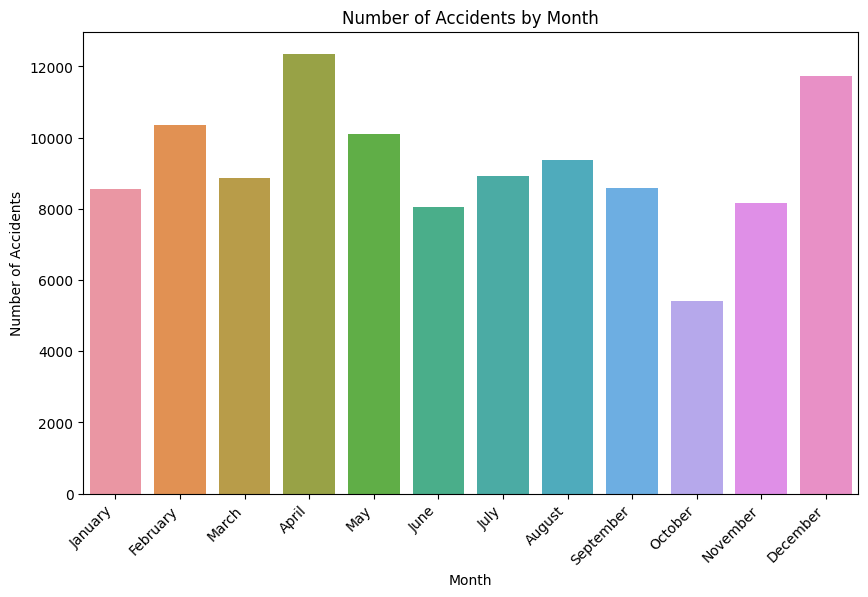

In [20]:
# Define the correct order of months
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Ensure 'Month' is ordered correctly
accident_recent_year['Month'] = pd.Categorical(accident_recent_year['Month'], categories=month_order, ordered=True)

# Group by 'Month' and count the number of accidents
accidents_by_month = accident_recent_year.groupby(['Month']).size().reset_index(name='Accidents')

# Plot the data using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Accidents', data=accidents_by_month, ci=None, order=month_order)
plt.title("Number of Accidents by Month")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

This data visualization shows how many accidents happen during each month throughout the year 2022. In 2022, the greatest number of accidents happened in April while the least amount of accidents happened in October.

**Visualization 2:**

Do more accidents happen during day or night?

/var/folders/2n/bvbzz2f14hl7rv0l62pzp_c80000gn/T/ipykernel_73884/735707346.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sunrise_Sunset', y='Accidents', data=accidents_by_sunrise_sunset, ci=None)


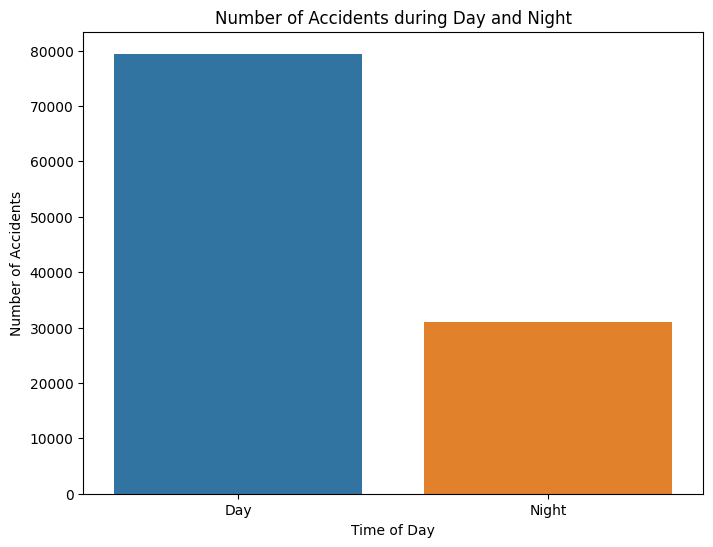

In [21]:
# Group by 'Sunrise_Sunset' and count the number of accidents in each group
accidents_by_sunrise_sunset = accident_recent_year.groupby('Sunrise_Sunset').size().reset_index(name='Accidents')

# Plot the data using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Sunrise_Sunset', y='Accidents', data=accidents_by_sunrise_sunset, ci=None)
plt.title("Number of Accidents during Day and Night")
plt.xlabel("Time of Day")
plt.ylabel("Number of Accidents")
plt.show()

From this data visualization, it is discovered that in 2022, there were more accidents during the day than at night.

**Visualization 3**

What is the predominant weather condition observed during accidents overall?

/var/folders/2n/bvbzz2f14hl7rv0l62pzp_c80000gn/T/ipykernel_73884/4231611532.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accident_recent_year['Weather_Category'] = accident_recent_year['Weather_Condition'].map(weather_lookup)
/var/folders/2n/bvbzz2f14hl7rv0l62pzp_c80000gn/T/ipykernel_73884/4231611532.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Weather_Category', y='Accidents', data=accidents_by_weather, ci=None)


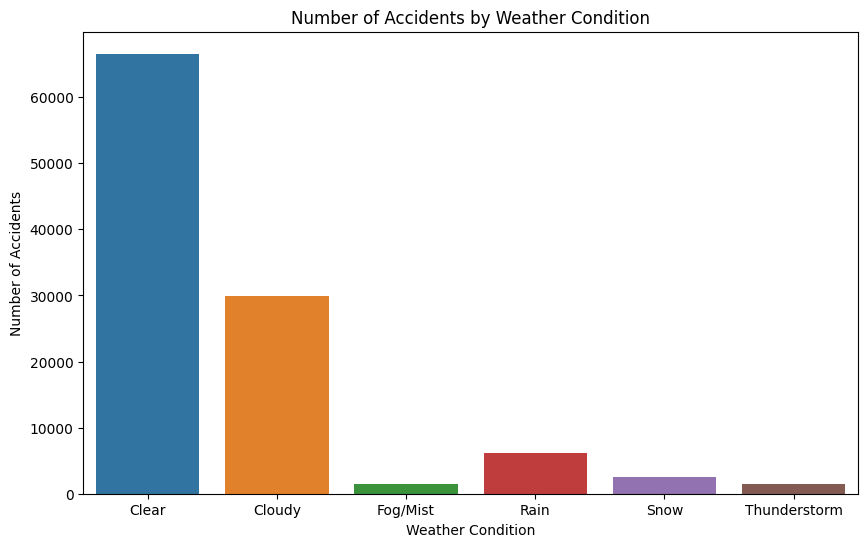

In [22]:
# Define a mapping for broader weather categories
weather_mapping = {
    'Clear': ['Fair', 'Fair / Windy', 'Partly Cloudy', 'Partly Cloudy / Windy'],
    'Cloudy': ['Cloudy', 'Mostly Cloudy', 'Mostly Cloudy / Windy', 'Cloudy / Windy'],
    'Rain': ['Rain', 'Light Rain', 'Heavy Rain', 'Light Drizzle', 'Drizzle', 'Heavy Drizzle', 'Rain / Windy'],
    'Thunderstorm': ['T-Storm', 'Thunder', 'Heavy T-Storm', 'Thunder / Windy', 'Thunder in the Vicinity', 'Heavy T-Storm / Windy'],
    'Snow': ['Snow', 'Light Snow', 'Heavy Snow', 'Blowing Snow', 'Snow / Windy', 'Snow and Thunder'],
    'Fog/Mist': ['Fog', 'Shallow Fog', 'Patches of Fog', 'Drifting Snow / Windy', 'Mist', 'Mist / Windy']
}

# Reverse the weather mapping to create a quick lookup
weather_lookup = {cond: category for category, conditions in weather_mapping.items() for cond in conditions}

# Apply the mapping to create broader categories for 'Weather_Condition'
accident_recent_year['Weather_Category'] = accident_recent_year['Weather_Condition'].map(weather_lookup)

# Group by 'Weather_Category' and count the number of accidents in each category
accidents_by_weather = accident_recent_year.groupby('Weather_Category').size().reset_index(name='Accidents')

# Plot the data using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Weather_Category', y='Accidents', data=accidents_by_weather, ci=None)
plt.title("Number of Accidents by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.show()

From this data visualization, it is discovered that in 2022, most accidents occurred under clear weather conditions, when it is sunny with little clouds in the sky. The least number of accidents occurred during bad weather conditions such as thunderstorms, fog and more.

A reason for the greatest number of accidents happening during clear weather conditions can be from the brightness of the sun reflecting off objects and shining into the eyes of the driver, blinding them for a second and causing them to crash their vehicle. 

A reason for the few accidents happening during heavy fog and thunderstorms can be because there are fewer people driving on the road during these weather conditions.

**Visualization 4:**

Which state has the most accidents?
Do southern states have more accidents than northern states? Is this because it gets colder and snows in the north than in the south?

/var/folders/2n/bvbzz2f14hl7rv0l62pzp_c80000gn/T/ipykernel_73884/278973901.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='State', y='Accidents', data=accidents_by_state, ci=None)


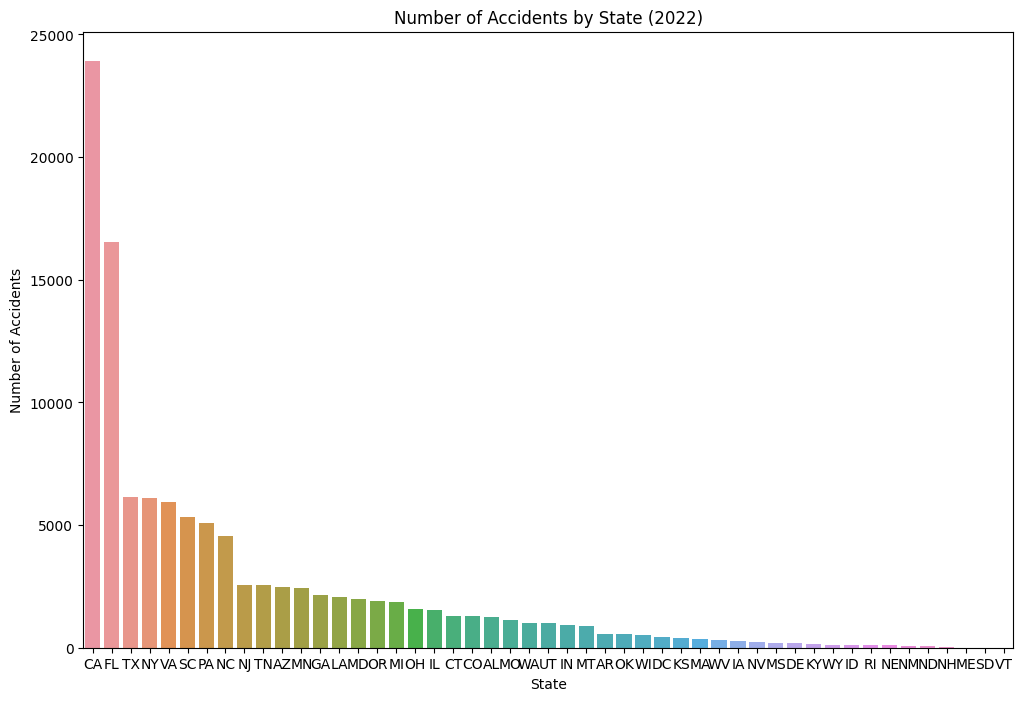

In [23]:
# Group by 'State' and count the number of accidents in each state
accidents_by_state = accident_recent_year.groupby('State').size().reset_index(name='Accidents')

# Sort by the number of accidents for a clearer visualization
accidents_by_state = accidents_by_state.sort_values(by='Accidents', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='State', y='Accidents', data=accidents_by_state, ci=None)
plt.title("Number of Accidents by State (2022)")
plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.show()

From this data visualization, we can see that  In 2022, California reportedly had the most number of accidents followed by Florida and Texas in second and third place respectively. South Dakota & Vermont had the least number of accidents.

### Discussion

**Findings**

In our project, we learned a lot about how accident rates change with varied weather and time of day when analyzing the US Accidents data from 2022. We discovered that April had the most incidents per month, with the majority of them happening during the day. This implies that higher accident rates may have been caused by variables unrelated to visibility. Surprisingly, we discovered that the clearest days had the largest frequency of incidents based on weather. This challenges the common perception that adverse weather conditions are a primary factor in road accidents, a question we had sought to explore.

Implications that could explain why the most accidents occurred in April, during the daytime, and during the clearest times of day may suggest that since no adverse weather conditions are occurring at this time, people may be driving more aggressively, exhibiting road rage, or behaving less responsibly. Traffic lawmakers may find this information useful in enforcing speed limits or implementing speed cameras. Despite popular belief, fewer incidents actually happened during potentially dangerous weather conditions like rain, fog, or snow. This may suggest that in bad weather, people drive more carefully and attentively or choose not to travel at all. This emphasizes the need for increased awareness of the likelihood of accidents occurring in clear weather.

This project has implications for society and traffic laws in various ways. We now know that periods with greater accident rates, especially during the day, call for stricter traffic laws. Stricter laws must be implemented since aggressive and careless driving may be the cause of this. Given how unexpected the project's findings were, we think more research on this subject is necessary. Additional investigation or studies may shed light on why there are more accidents during the day and in clear weather, perhaps because of how drivers behave in ideal weather versus situations where caution is required. Comparing results from studies on traffic accident statistics in other nations may also be helpful. If there are nations that have fewer accidents, traffic policymakers could learn from their strategies.

### Limitations 

This dataset is a smaller dataset from Kaggle and consists of around 500,000 accident data from 49 states.  This data has missing data due to internet connectivity issues and has certain columns named in the file but is often left blank due to loss of data on that day. In addition, this dataset is from 5 years from 2017-2023. Most of the data was during the COVID-19 pandemic when driving decreased due to pandemic rules and necessity. Most people were home most of the time unless their occupation required them to drive or they needed essential items. Moreover, some of the columns go by a ranking system and there is no guide on how the authors of the dataset came up with their ranking systems. 

Our analyses needed to be cleaned as a significant amount of columns were not relevant to our analysis. Some of our outputs contain data that is hard to understand since they are in terms of coordinates. In addition, some of our analyses are limited as some of the data that is used for our analyses is during the COVID-19 pandemic, a time when the use of transportation decreased significantly, and does not indicate accurate accident data. Our visualizations contain a plethora of information. Due to us having a huge dataset, some of our visualizations have an excess of information displayed, making it difficult for users to interpret and decipher the data. 

### Conclusion 

Finally, our analysis of US Accidents data from 2022 contradicts traditional assumptions of road safety dynamics, exhibiting surprising trends and requiring a reevaluation of key factors impacting accident rates. Despite expectations, the highest number of accidents occurred during clear weather conditions, particularly in April and during daylight hours, implying that factors other than visibility, such as aggressive driving or a lack of caution, may have contributed to the increased accident rates during these times. In contrast, fewer incidents were reported during unfavorable weather conditions such as rain or fog, indicating a potential increase in careful driving behavior. These findings highlight the significance of revisiting assumptions regarding the connection between weather and road safety, suggesting the development of improved traffic rules and enforcement techniques. However, we have to acknowledge the limitations of our analysis, which include data incompleteness, relevance concerns, and the influence of the COVID-19 epidemic on driving behaviors. Further analysis and data refinement are required to have complete knowledge of road accident patterns and build effective road safety regulations.